This notebook plots the vehicle fleet data as output from TEAM-Kenya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# import technology data
technology = pd.read_csv(f'./../data/technology.csv')
technology

,TechID,ModeID,VehTypeID,MassCatID,FuelID,EngineID,TransTypeID,Availability,Final_Year,HybridFlag,spec_energ_consump,spec_energ_electric,noise_class,PurchasePrice,ExpectedLifeFactor,Capacity,AveEconLife,SecondHandImportFlag,note
0,10,1,2,4,1,10,1,1980,2000.0,0,6.57,NaN,0,5000.0,1,2.0,10,0,NaN
1,20,1,2,4,12,10,1,1995,2010.0,0,9.51,NaN,2,7000.0,1,2.0,10,0,NaN
2,25,1,2,4,12,11,1,2010,2020.0,0,8.38,NaN,2,6000.0,1,2.0,10,0,NaN
3,26,1,2,4,12,12,1,2020,NaN,0,7.18,NaN,2,5500.0,1,2.0,10,0,NaN
4,30,1,2,4,1,11,1,2000,2010.0,0,5.65,NaN,0,5000.0,1,2.0,10,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,14889,1,5,28,13,13,2,2033,2038.0,0,179.20,1.0,2,14000.0,1,2.5,10,1,NaN
2242,14890,1,5,28,13,13,2,2038,2043.0,0,153.89,1.0,2,12000.0,1,2.5,10,1,NaN
2243,14891,1,5,28,13,13,2,2043,2048.0,0,132.15,1.0,2,12000.0,1,2.5,10,1,NaN
2244,14892,1,5,28,13,13,2,2048,2053.0,0,113.48,1.0,2,12000.0,1,2.5,10,1,NaN


In [30]:
# import calibration data from TSDK
def import_calibration_data(country='Kenya', start_year=2012, end_year=2021):
    
    # read TSDK and isolate country data
    df = pd.read_excel("TSDK_ALL.xlsx", sheet_name="Data")
    country_data = df[df['Country name'] == country][['Country name', 'Data code', 'Citation', 'Unit'] + [y for y in range(
        start_year, end_year)]]
    
    # return moto data
    moto_stock = country_data[(country_data['Data code'] == 'ROAD_EQS_MOTORC') & (country_data['Citation'].str.contains('KNBS'))]  # use KNBS data
    
    # return car data
    car_stock = country_data[(country_data['Data code'] == 'ROAD_EQS_CAR') & (country_data['Citation'].str.contains('KNBS'))]  # use KNBS data
    
    return pd.Series(moto_stock.iloc[0]).dropna(), pd.Series(car_stock.iloc[0]).dropna()
    

In [31]:
moto_stock, car_stock = import_calibration_data()

Text(0.5, 1.0, 'Calibration data - source: KNBS')

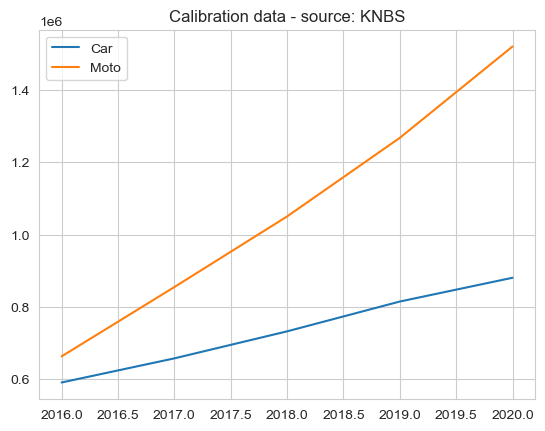

In [32]:
fig, ax = plt.subplots()
ax.plot(car_stock[range(2016,2021)], label='Car')
ax.plot(moto_stock[range(2016,2021)], label='Moto')
plt.legend()
plt.title('Calibration data - source: KNBS')

In [33]:
# import interface vsm data
def import_interface_vsm(scenario):
    interface_vsm = pd.read_excel(f'./../TEAM-Kenya_data_out/scenarios-out/{scenario}/Interface_VSM_NumVeh.xlsx')
    return interface_vsm

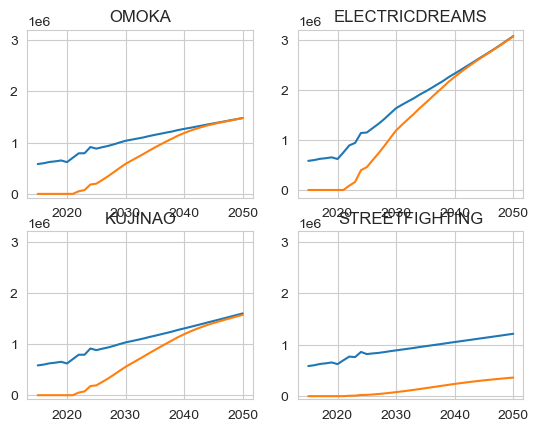

In [38]:
# plot moto stock

scenarios = ['OMOKA','ELECTRICDREAMS','KUJINAO','STREETFIGHTING']

fig, axs = plt.subplots(2, 2)
axs_flat = axs.flatten()
axs_ind=0

for scenario in scenarios:
    interface_vsm = import_interface_vsm(scenario)
    
    years = range(2015,interface_vsm.Year.max()+1)
    e_trace = []
    trace=[]
    for year in years:
        trace.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==2].TechID)) & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
        e_trace.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==2].TechID)) & (interface_vsm.TechID.isin(technology[technology.FuelID==12].TechID))  & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
    
    ax = axs_flat[axs_ind]
    
    ax.plot(years,trace,label='all moto')
    # ax.plot(years, e_trace,label='electric moto')
    ax.set_ylim(top=3.2e6)
    
    # plt.legend()
    ax.set_title(scenario)
    axs_ind +=1

fig.tight_layout()

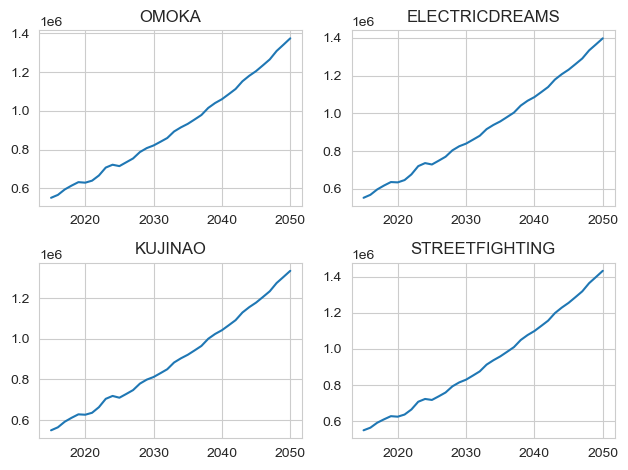

In [39]:
# plot car stock

scenarios = ['OMOKA','ELECTRICDREAMS','KUJINAO','STREETFIGHTING']

fig, axs = plt.subplots(2, 2)
axs_flat = axs.flatten()
axs_ind=0

for scenario in scenarios:
    interface_vsm = import_interface_vsm(scenario)
    
    years = range(2015,interface_vsm.Year.max()+1)
    e_trace = []
    trace=[]
    for year in years:
        trace.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==3].TechID)) & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
        e_trace.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==3].TechID)) & (interface_vsm.TechID.isin(technology[technology.FuelID==12].TechID))  & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
    
    ax = axs_flat[axs_ind]
    
    ax.plot(years,trace,label='all car')
    #ax.plot(years, e_trace,label='electric car')
    #ax.set_ylim(top=3.2e6)
    
    # plt.legend()
    ax.set_title(scenario)
    axs_ind +=1
    
fig.tight_layout()

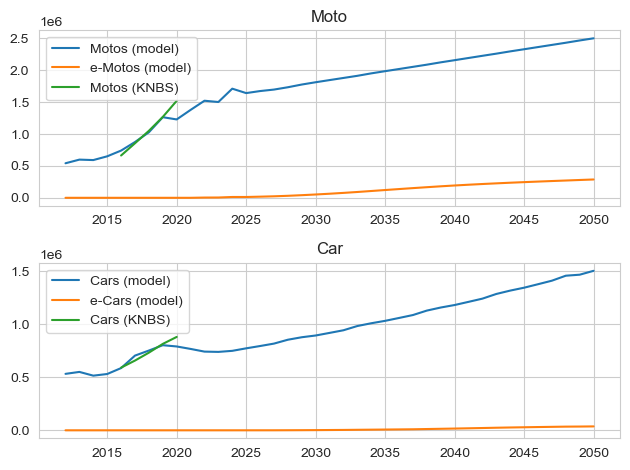

In [70]:
# calibration - plot specified scenario vs calibration data
scenario = 'STREETFIGHTING'
interface_vsm = import_interface_vsm(scenario)
moto_stock, car_stock = import_calibration_data()

# TEAM out data
all_motos = []
all_cars = []
e_motos = []
e_cars = []
for year in range(2012, 2051):
    all_motos.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==2].TechID)) & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
    all_cars.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==3].TechID)) & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
    e_motos.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==2].TechID)) & (interface_vsm.TechID.isin(technology[technology.FuelID==12].TechID))  & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
    e_cars.append(interface_vsm[(interface_vsm.TechID.isin(technology[technology.VehTypeID==3].TechID)) & (interface_vsm.TechID.isin(technology[technology.FuelID==12].TechID))  & (interface_vsm.Year==year) & (interface_vsm.VehCatID=='T')].NumVeh.sum())
    
fig, axs = plt.subplots(2, 1)

# motos
axs.flatten()[0].plot(range(2012, 2051), all_motos, label='Motos (model)')
axs.flatten()[0].plot(range(2012, 2051), e_motos, label='e-Motos (model)')
axs.flatten()[0].plot(moto_stock[range(2016,2021)], label='Motos (KNBS)')
axs.flatten()[0].set_title('Moto')
axs.flatten()[0].legend()

# cars
axs.flatten()[1].plot(range(2012, 2051), all_cars, label='Cars (model)')
axs.flatten()[1].plot(range(2012, 2051), e_cars, label='e-Cars (model)')
axs.flatten()[1].plot(car_stock[range(2016,2021)], label='Cars (KNBS)')
axs.flatten()[1].set_title('Car')
axs.flatten()[1].legend()

fig.tight_layout()